In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

Change `json_path` here

In [2]:
json_path = './data_balancers_prediction_accuracy (-4 - 8, 2, 10 runs, 2nd pass).json'

In [3]:
with open(json_path) as f:
    data = json.load(f)
timings = []
for d in data["datapoints"]:
    s = d["setting"]
    comp = list(map(lambda x: (x["computationTime"]),
                   sorted(d["data"]["workers"], key=lambda x: x["rank"])))
    comp = max(comp)
    timings.append((comp, d['data']["balancer"]['time'], s['predictionAccuracy']))

#print(len(timings), timings)

In [4]:
cpT, balT, predA = zip(*timings)

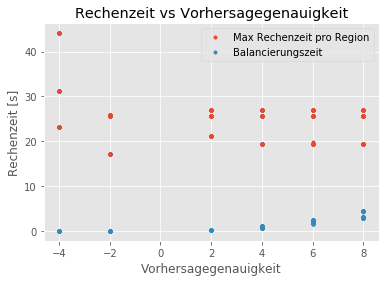

In [5]:
plt.style.use('ggplot')

x = np.asarray(predA)
#  time in s
cp = np.asarray(cpT) / 1e6
bal = np.asarray(balT) / 1e6


fig, host = plt.subplots()
#par1 = host.twinx()

host.plot(x, cp, label="Max Rechenzeit pro Region", lw=0, marker=".")
host.plot(x, bal, label="Balancierungszeit", lw=0, marker=".")

host.set(xlabel='Vorhersagegenauigkeit', ylabel='Rechenzeit [s]',
    title='Rechenzeit vs Vorhersagegenauigkeit'
)
#host.axis([None, None, 0, 15])

#host.set(ylabel='Balancierungszeit [s]')
#par1.axis([None, None, 0, 3])
#par1.grid(False)


host.legend()
#par1.legend()
host.grid(True)
#plt.xticks(x)

#fig.savefig("scaling_graph.svg", format="svg")
plt.show()